In [8]:
import sys
import numpy as np
import cv2
sys.path.append('..')    
from letter_extraction import ThresholdParams, ThresholdDetector, EdgeDetector, ChunkExtractor, EdgeParams
from letter_extraction import ExtractFragmentParams, ContoursExtractor, CompositeExtractor
from metrics import KeyboardLayout, LetterExtractionMetric

In [3]:
layout_func = (lambda x: KeyboardLayout("../keyboards/layouts/keyboard{}.layout".format(x), '../'))
keyboard_layouts = map(layout_func, range(1, 26))

In [4]:
def test_contours_extractor(contours_detector, extract_params):
    contours_extractor = ContoursExtractor(contours_detector, extract_params)
    return LetterExtractionMetric.score_layouts(keyboard_layouts, contours_extractor)

def test_extract_params(contours_detector):
    max_score = 0.0
    best_params = None
    for min_scale in [50, 100]:
        for max_scale in [20, 10]:
            for extract_scale in [0.9, 1.0, 1.1, 1.2, 1.3, 1.5]:
                extract_params = ExtractFragmentParams(min_scale, max_scale, extract_scale)
                score = test_contours_extractor(contours_detector, extract_params)
                if score > max_score:
                    score = max_score
                    best_params = extract_params
    return {'score': max_score, 'params': best_params}

## Testing ChunkDetector params

In [5]:
def test_chunk_detector_params():
    max_score = 0.0
    for chunk_count in np.linspace(20, 80, 13):
        chunk_extractor = ChunkExtractor(chunk_count)
        score = LetterExtractionMetric.score_layouts(keyboard_layouts, chunk_extractor)
        print("Chunk count: {}, score: {}".format(chunk_count, score))

In [6]:
test_chunk_detector_params()

Chunk count: 20.0, score: 17.1486568987
Chunk count: 25.0, score: 66.1677846577
Chunk count: 30.0, score: 109.038974893
Chunk count: 35.0, score: 213.02399247
Chunk count: 40.0, score: 220.097358784
Chunk count: 45.0, score: 248.694409618
Chunk count: 50.0, score: 196.09246412
Chunk count: 55.0, score: 236.5170581
Chunk count: 60.0, score: 165.192094024
Chunk count: 65.0, score: 154.943207585
Chunk count: 70.0, score: 125.124441853


KeyboardInterrupt: 

## Testing EdgeDetector params

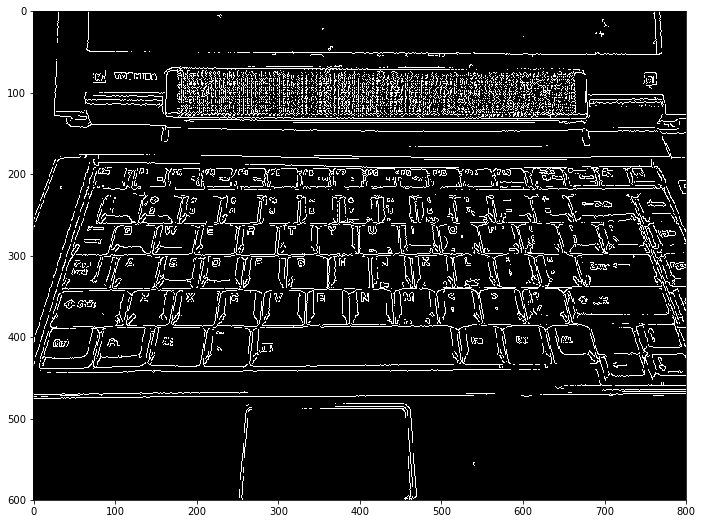

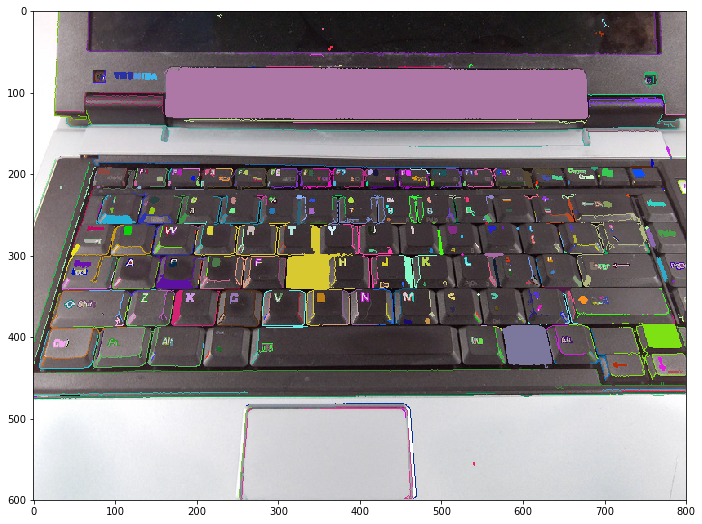

In [22]:
edge_params = EdgeParams(min_edge_thres=50, max_edge_thres=230, retr_type=1L, retr_approx=2L, min_poly=3, max_area_scale=1)
edge_detector = EdgeDetector(edge_params)
edge_detector.plot_contours_image(KeyboardLayout("../keyboards/layouts/keyboard12.layout", '../').get_image())

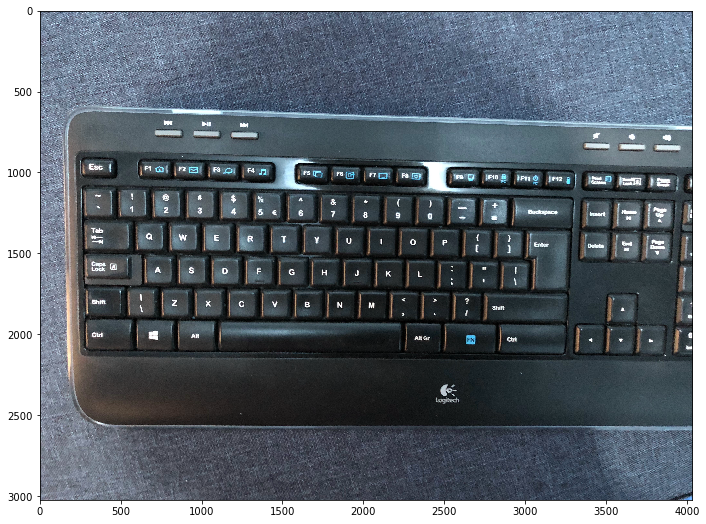

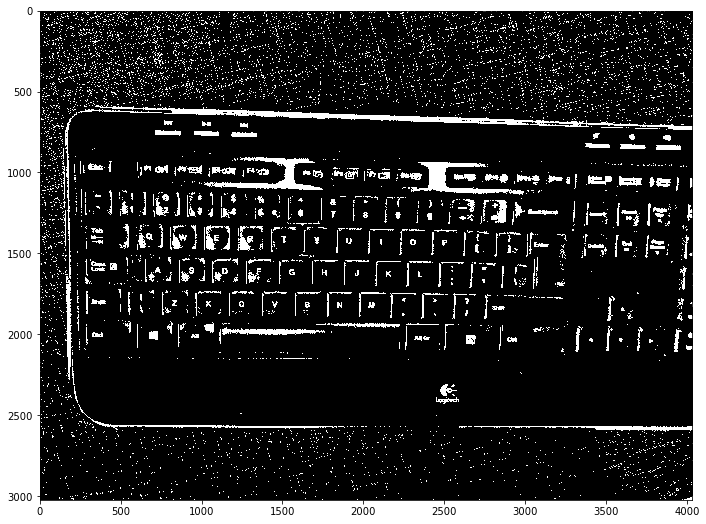

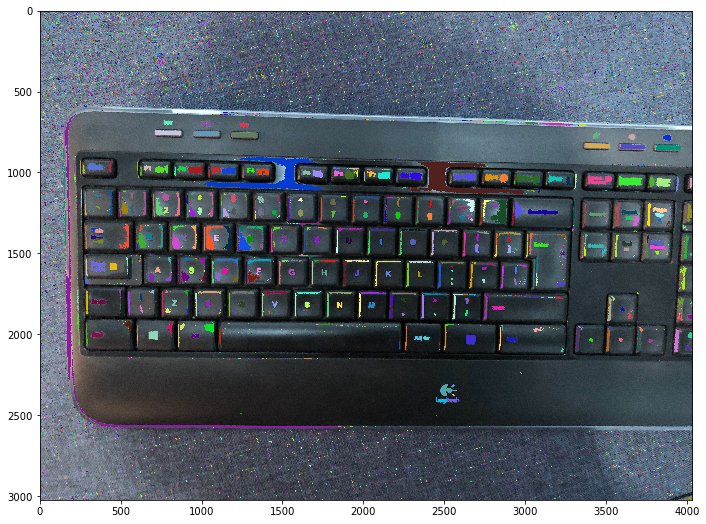

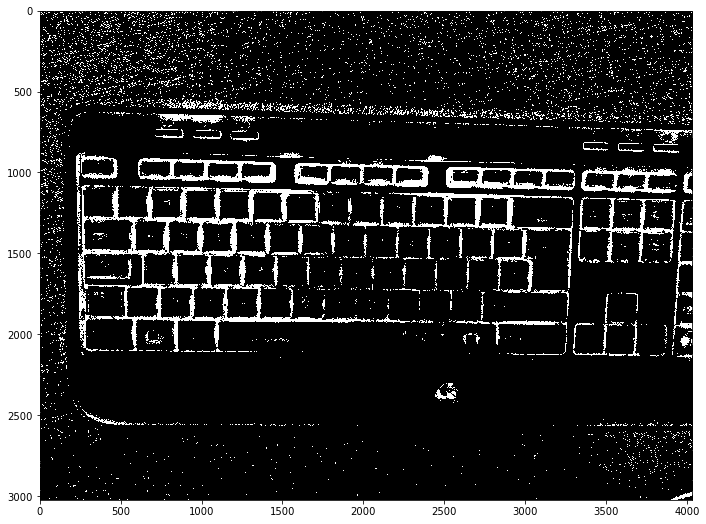

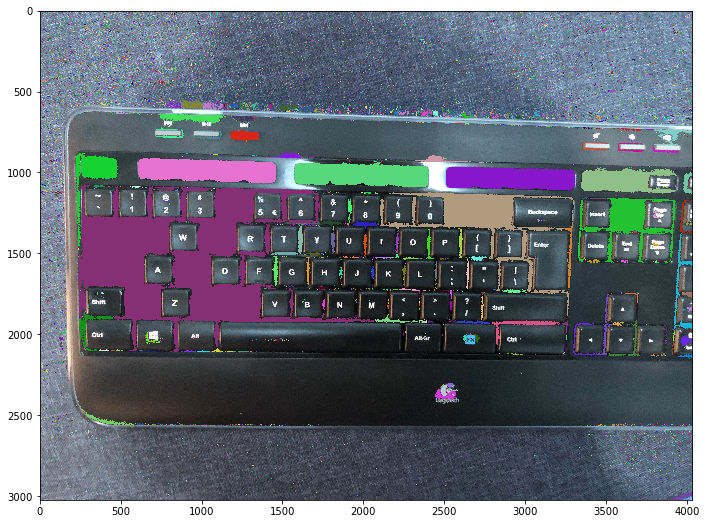

In [25]:
thres_detector = ThresholdDetector()
thres_detector.plot_contours_images(KeyboardLayout("../keyboards/layouts/keyboard1.layout", '../').get_image())

## Testing ThresholdDetector params

In [ ]:
def test_thres_detector_params():
    max_score = 0.0
    for r_approx in [cv2.CHAIN_APPROX_NONE, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_TC89_L1]:
        for r_type in [cv2.RETR_LIST, cv2.RETR_TREE, cv2.RETR_EXTERNAL]:
            for min_poly in [3, 5, 7]:
                for b_scale in [20, 30, 40]:
                    for s_thres in [-30, 0, 30]:                                                                        
                        thres_params = ThresholdParams(b_scale, s_thres, r_type, r_approx, min_poly)
                        contours_detector = ThresholdDetector(thres_params)
                        score = test_extract_params(contours_detector)['score']
                        if score > max_score:
                            max_score = score
                            best_params = thres_params
                        print("Params: {}, score: {} (best: {})".format(thres_params, score, max_score))
    return thres_params

In [ ]:
test_thres_detector_params()